# 7장 머신러닝 알고리즘과 모델

## 7.1 사이킷런 분류기(scikit-learn classifier)

In [181]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

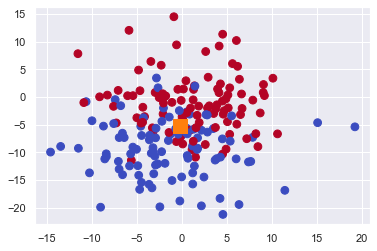

In [182]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

In [183]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])
Xnew = Xmean[np.newaxis, :]

In [184]:
np.random.seed(1357) 

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [186]:
MLA = [KNeighborsClassifier(), GaussianNB(),  LogisticRegression(), 
       DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier()]

In [187]:
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
def plot_model(X, y, clf) :
    print('*'*50); print(clf)
    clf.fit(X, y)
    accuracy = cross_val_score(clf, X, y, scoring = 'accuracy').mean()*100
    y_predict = clf.fit(X, y).predict(Xnew)
    y_proba_buy = clf.fit(X, y).predict_proba(Xnew)[:,1]
    print('정확도 {0:.2f}%'.format(accuracy))
    print('예측분류값:', y_predict)
    print('예측확률:', y_proba_buy)
    plt.figure(figsize=(12,5))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(clf)

**************************************************
KNeighborsClassifier()
정확도 76.00%
예측분류값: [1]
예측확률: [0.6]
**************************************************
GaussianNB()
정확도 77.00%
예측분류값: [1]
예측확률: [0.53065434]
**************************************************
LogisticRegression()
정확도 80.00%
예측분류값: [0]
예측확률: [0.49951034]
**************************************************
DecisionTreeClassifier()
정확도 72.50%
예측분류값: [1]
예측확률: [1.]
**************************************************
RandomForestClassifier()
정확도 76.50%
예측분류값: [1]
예측확률: [0.62]
**************************************************
AdaBoostClassifier()
정확도 72.00%
예측분류값: [1]
예측확률: [0.50831257]


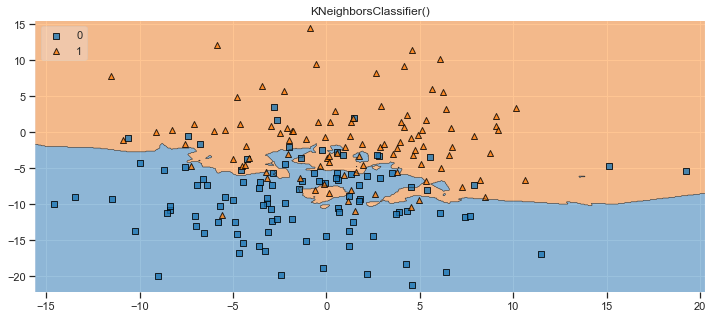

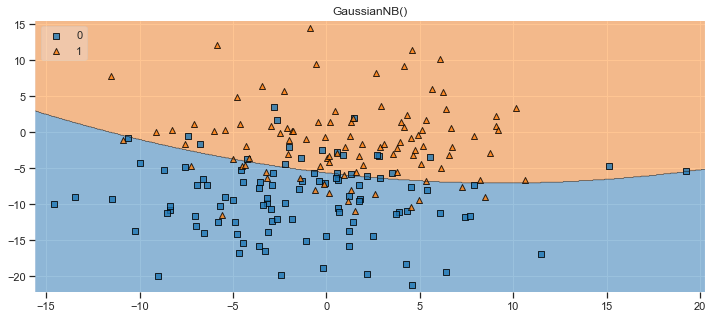

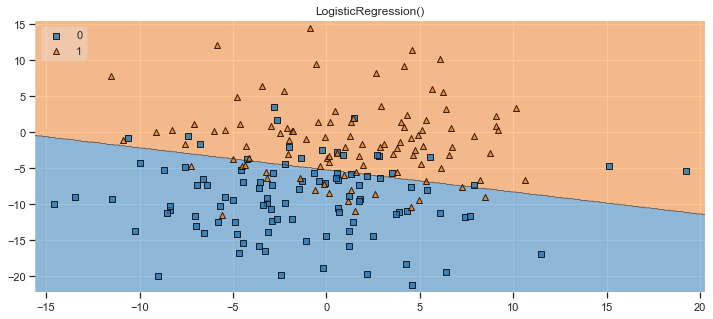

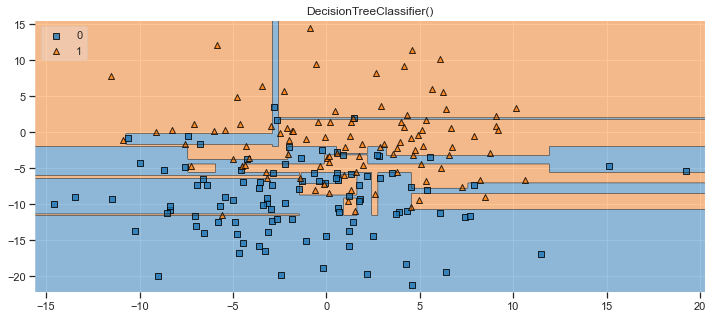

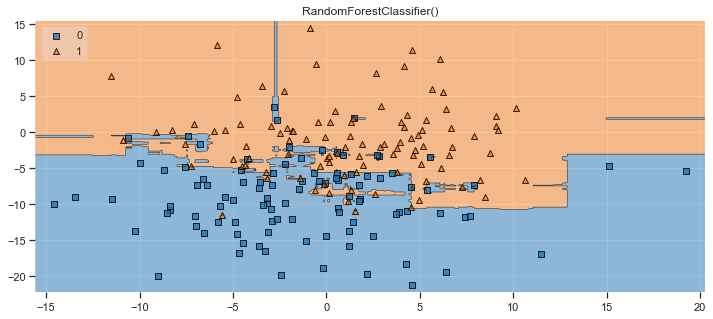

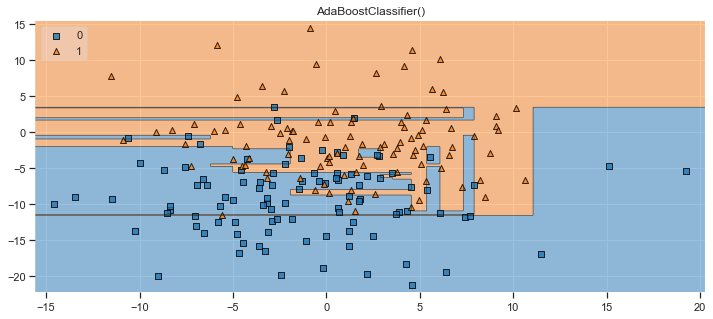

In [188]:
for clf in MLA :
    plot_model(X, y, clf)

In [189]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

## 7.2 K-최근접 이웃(k-nearest neighbors)

In [190]:
X = pd.read_pickle('../data/X.pkl') 
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X.head()

((3997, 26), (3997,))

,tv9,drama3,지역_부산울산경남,지역_경기인천,tv4,drama4,직업_무직기타,지역_대구경북,tv15,tv8,...,모바일평일,tv3,tv2,성별_2,주거형태,직업_기능노무직,drama9,drama8,직업_학생재수생,tv7
0,2.30963,-0.396918,0,0,0.638663,-1.740786,0,0,-0.067259,-0.338545,...,1.451424,-0.637110,-0.728984,0,-2.520823,0,3.407174,-0.371179,1,-0.226117
1,-0.43297,-0.396918,0,0,0.638663,-0.458220,0,0,-0.067259,-0.338545,...,-0.863126,1.569587,-0.728984,0,-0.283760,0,-0.293498,-0.371179,1,0.858863
2,2.30963,-0.396918,0,0,0.638663,-0.458220,0,0,-0.067259,-0.338545,...,0.525604,-0.637110,-0.728984,0,1.953302,0,-0.293498,-0.371179,1,-0.226117
3,2.30963,-0.396918,0,0,-1.565772,0.824347,0,0,-0.067259,-0.338545,...,-0.400216,-0.637110,-0.728984,0,-0.283760,0,-0.293498,-0.371179,1,-0.226117
4,2.30963,-0.396918,0,0,0.638663,-0.458220,0,0,-0.067259,-0.338545,...,1.451424,-0.637110,-0.728984,0,-0.283760,0,-0.293498,-0.371179,1,0.858863


In [191]:
np.random.seed(1357)

In [192]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=1)        
model.fit(X, y)                                     
y_predict = model.predict(X)

KNeighborsClassifier(n_neighbors=1)

In [193]:
from sklearn.preprocessing import StandardScaler
print(type(StandardScaler()))
print(type(model))
print(type(1.0)) 
print(type('hello'))

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
<class 'float'>
<class 'str'>


In [194]:
comparison = y_predict !=  y
np.sum(comparison*1)
np.sum(comparison*1)/X.shape[0]*100
100- (np.sum(comparison*1)/X.shape[0])*100

1

0.02501876407305479

99.97498123592695

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict)

0.9997498123592694

In [196]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, train_size=0.5, stratify= y, random_state=11)
X1.shape, X2.shape, y1.shape, y2.shape
X1.index, y1.index, X2.index, y2.index
y1.value_counts(normalize=True)
y2.value_counts(normalize=True)

((1998, 26), (1999, 26), (1998,), (1999,))

(Int64Index([2277, 3843, 1455,  782,  163,  872,  153, 2470, 3260, 2840,
             ...
             1867,  998,  184, 1710,  177,  971,  461, 1938, 3037, 1423],
            dtype='int64', length=1998),
 Int64Index([2277, 3843, 1455,  782,  163,  872,  153, 2470, 3260, 2840,
             ...
             1867,  998,  184, 1710,  177,  971,  461, 1938, 3037, 1423],
            dtype='int64', length=1998),
 Int64Index([3779,  167, 3846, 1126, 3318, 2468, 3706, 3395, 2202, 3685,
             ...
             3446, 3721, 1021, 1354,  330, 1424, 2254, 2614, 2741,  275],
            dtype='int64', length=1999),
 Int64Index([3779,  167, 3846, 1126, 3318, 2468, 3706, 3395, 2202, 3685,
             ...
             3446, 3721, 1021, 1354,  330, 1424, 2254, 2614, 2741,  275],
            dtype='int64', length=1999))

0    0.653153
1    0.346847
Name: 구매, dtype: float64

0    0.652826
1    0.347174
Name: 구매, dtype: float64

In [197]:
model.fit(X1,y1)
model.score(X2, y2).round(4)

model.fit(X2,y2)
model.score(X1, y1).round(4)

KNeighborsClassifier(n_neighbors=1)

0.5978

KNeighborsClassifier(n_neighbors=1)

0.6051

In [198]:
y2_predict = model.fit(X1, y1).predict(X2)
y1_predict = model.fit(X2, y2).predict(X1)
accuracy_score(y2, y2_predict).round(4)
accuracy_score(y1, y1_predict).round(4)

0.5978

0.6051

In [199]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.58625   , 0.60125   , 0.5669587 , 0.5456821 , 0.60700876])

In [200]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=11)
cross_val_score(model, X, y, cv=kf)
cross_val_score(model, X, y, cv=kf).mean()
cross_val_score(model, X, y, cv=kf).std()

array([0.58125   , 0.5775    , 0.57822278, 0.57071339, 0.60700876])

0.582938986232791

0.012517963708784628

In [201]:
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index]    
    y_predict = model.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
accuracy_list
sum(accuracy_list)/len(accuracy_list)

[0.58125, 0.5775, 0.5782227784730913, 0.5707133917396746, 0.6070087609511889]

0.582938986232791

In [202]:
model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify= y, random_state=11)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
model.fit(X_train, y_train)

((3197, 26), (3197,))

((800, 26), (800,))

KNeighborsClassifier()

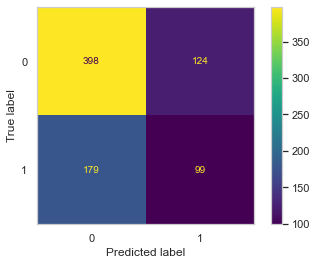

In [203]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

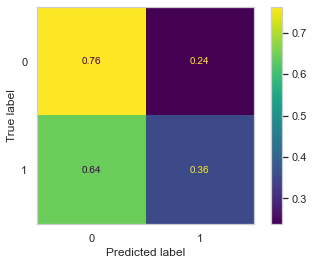

In [204]:
plot_confusion_matrix(model, X_test, y_test, normalize='true')

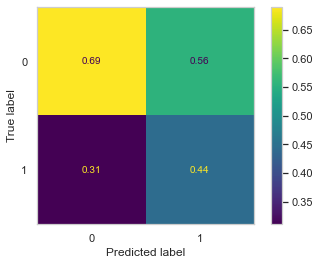

In [205]:
plot_confusion_matrix(model, X_test, y_test, normalize='pred')

In [206]:
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       522
           1       0.44      0.36      0.40       278

    accuracy                           0.62       800
   macro avg       0.57      0.56      0.56       800
weighted avg       0.60      0.62      0.61       800



In [207]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro']
cross_validate(model, X_train, y_train, cv=kf, scoring=scoring)

{'fit_time': array([0.01795197, 0.01692724, 0.0159564 , 0.01695752, 0.01695538]),
 'score_time': array([0.06585217, 0.06485391, 0.0648241 , 0.0648272 , 0.06579542]),
 'test_accuracy': array([0.6375    , 0.6234375 , 0.64632238, 0.6228482 , 0.63536776]),
 'test_precision_macro': array([0.58051842, 0.56714643, 0.59278803, 0.58372211, 0.57642885]),
 'test_recall_macro': array([0.56705796, 0.55769376, 0.58333333, 0.57882926, 0.56512999])}

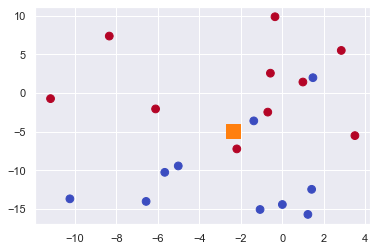

In [208]:
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(20, 2, centers=2, random_state=2, cluster_std=5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

In [209]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])
Xnew = Xmean[np.newaxis, :]
model = KNeighborsClassifier(2)                    
y_predict = model.fit(X, y).predict(X)
model.fit(X, y).predict(Xnew)
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([0])

정확도(Accuracy): 75.00%


In [210]:
model = KNeighborsClassifier(7)                     
y_predict = model.fit(X, y).predict(X)
model.fit(X, y).predict(Xnew)
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([1])

정확도(Accuracy): 85.00%


In [211]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [212]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify=y, random_state=11)

In [213]:
np.random.seed(1357)
hyperparameters = dict(n_neighbors=[1, 2, 3, 11, 17])

In [214]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid = hyperparameters,
                    cv=kf, scoring='recall_macro')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 11, 17]},
             scoring='recall_macro')

In [215]:
grid.best_estimator_
grid.best_estimator_.get_params()

KNeighborsClassifier(n_neighbors=11)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [216]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.572
test score: 0.564
optimal parameter: {'n_neighbors': 11}


In [217]:
y_predict = grid.predict(X_test)
y_proba= grid.predict_proba(X_test)
data = pd.DataFrame(y_proba, columns =['비구매확률', '구매확률']).round(2)
data['분류(y_predict)'] = y_predict
data

,비구매확률,구매확률,분류(y_predict)
0,0.45,0.55,1
1,0.82,0.18,0
2,0.45,0.55,1
3,0.82,0.18,0
4,0.73,0.27,0
...,...,...,...
795,0.82,0.18,0
796,0.64,0.36,0
797,0.82,0.18,0
798,0.64,0.36,0


(array([ 98., 143., 135., 130., 113.,  78.,  62.,  26.,  12.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

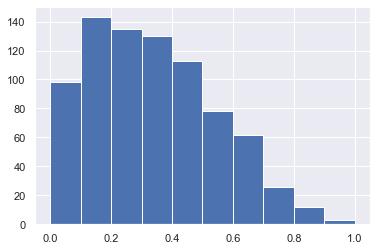

(array([  3.,  12.,  26.,  62.,  78., 113., 130., 135., 143.,  98.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

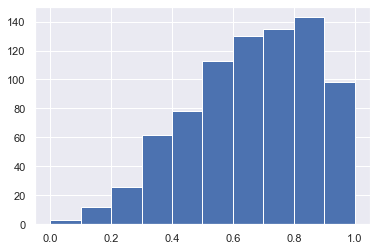

In [218]:
plt.hist(y_proba[:, 1]); plt.show()
plt.hist(y_proba[:, 0])

In [219]:
hyperparameters= dict(n_neighbors=[1, 2, 3, 11, 17],
                      weights=['uniform','distance'],
                      leaf_size= list(range(4,6)))

In [220]:
scorings = ['accuracy', 'recall_macro']
gs = GridSearchCV(KNeighborsClassifier(),
                  hyperparameters,
                  cv=kf,
                  scoring=scorings,
                  refit = 'recall_macro',
                 )
gs.fit(X_train, y_train).best_score_
gs.fit(X_train, y_train).best_estimator_

0.5790988744304105

KNeighborsClassifier(leaf_size=4, n_neighbors=11, weights='distance')

In [221]:
len(list(range(5,50)))

45

In [222]:
from sklearn.model_selection import RandomizedSearchCV
param_dist= dict(n_neighbors=list(range(5,105, 2)),
                      weights=['uniform','distance'],
                      algorithm= ['ball_tree', 'kd_tree'],
                      leaf_size= list(range(5,50)))
np.random.seed(1357)

In [223]:
rs = RandomizedSearchCV(KNeighborsClassifier(), 
                        param_distributions= param_dist, cv=kf,
                        n_iter=50, scoring='recall_macro', verbose=True)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   20.4s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19, 21, 23, 25, 27, 29,
                                                        31, 33, 35, 37, 39, 41,
                                                        43, 45, 47, 49, 51, 53,
                                                        55, 57, 59, 61, 63, ...],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall_macro', verbose=True)

In [224]:
print('optimal train score: {:.3f}'.format(rs.best_score_)) 
print('test score: {:.3f}'.format(rs.score(X_test, y_test)))
print('optimal parameter: {}'.format(rs.best_params_))

optimal train score: 0.587
test score: 0.562
optimal parameter: {'weights': 'distance', 'n_neighbors': 9, 'leaf_size': 22, 'algorithm': 'ball_tree'}


In [225]:
results = pd.DataFrame(rs.cv_results_)[['params', 'mean_test_score',
                                        'rank_test_score']]
results.sort_values('rank_test_score').round(4).head(10)

,params,mean_test_score,rank_test_score
17,"{'weights': 'distance', 'n_neighbors': 9, 'lea...",0.5873,1
12,"{'weights': 'distance', 'n_neighbors': 7, 'lea...",0.5822,2
19,"{'weights': 'uniform', 'n_neighbors': 7, 'leaf...",0.5820,3
47,"{'weights': 'distance', 'n_neighbors': 13, 'le...",0.5760,4
6,"{'weights': 'distance', 'n_neighbors': 5, 'lea...",0.5724,5
20,"{'weights': 'distance', 'n_neighbors': 27, 'le...",0.5685,6
42,"{'weights': 'uniform', 'n_neighbors': 25, 'lea...",0.5626,7
32,"{'weights': 'distance', 'n_neighbors': 37, 'le...",0.5625,8
40,"{'weights': 'uniform', 'n_neighbors': 17, 'lea...",0.5625,9
45,"{'weights': 'distance', 'n_neighbors': 41, 'le...",0.5615,10


              precision    recall  f1-score   support

           0       0.69      0.80      0.74       522
           1       0.46      0.32      0.38       278

    accuracy                           0.64       800
   macro avg       0.58      0.56      0.56       800
weighted avg       0.61      0.64      0.62       800



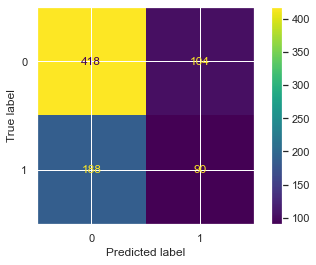

In [226]:
plot_confusion_matrix(rs, X_test, y_test)
y_predict = rs.predict(X_test)
print(classification_report(y_test, y_predict))

In [227]:
cat_attribs = X[X.columns[X.dtypes == 'category']].columns
num_attribs = [item for item in X.columns if item not in cat_attribs]

In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
feature_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    ])
feature_pipeline

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['tv9', 'drama3', '지역_부산울산경남', '지역_경기인천',
                                  'tv4', 'drama4', '직업_무직기타', '지역_대구경북', 'tv15',
                                  'tv8', 'drama15', '연령', '인터넷평일', '인터넷주말',
                                  '모바일주말', '성별_1', '모바일평일', 'tv3', 'tv2',
                                  '성별_2', '주거형태', '직업_기능노무직', 'drama9',
                                  'drama8', '직업_학생재수생', 'tv7']),
                                ('cat', OneHotEncoder(),
                                 Index([], dtype='object'))])

In [229]:
pd.DataFrame(feature_pipeline.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2.308829,-0.397384,-0.42955,1.417871,0.645354,-0.461647,-0.252071,-0.303718,-0.061381,-0.339268,...,-0.240014,-0.640981,-0.720253,1.011008,1.986114,-0.450818,-0.293151,-0.369471,-0.478195,-0.226213
1,-0.433120,-0.397384,-0.42955,1.417871,0.645354,-0.461647,-0.252071,-0.303718,-0.061381,-0.339268,...,-0.394237,-0.640981,-0.720253,-0.989112,-0.269519,2.218191,3.411211,-0.369471,-0.478195,-1.312103
2,2.308829,-0.397384,-0.42955,-0.705283,-1.549537,0.818393,-0.252071,3.292528,-0.061381,-0.339268,...,1.919113,-0.640981,-0.720253,-0.989112,-0.269519,-0.450818,-0.293151,-0.369471,2.091198,1.945567
3,-0.433120,-0.397384,-0.42955,1.417871,-1.549537,0.818393,-0.252071,-0.303718,-0.061381,-0.339268,...,-0.856907,-0.640981,1.388400,-0.989112,-0.269519,-0.450818,-0.293151,-0.369471,2.091198,1.945567
4,-0.433120,-0.397384,2.32802,-0.705283,0.645354,0.818393,-0.252071,-0.303718,-0.061381,-0.339268,...,-0.394237,-0.640981,-0.720253,-0.989112,-0.269519,-0.450818,-0.293151,-0.369471,-0.478195,0.859677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,-0.433120,-0.397384,-0.42955,1.417871,0.645354,-0.461647,-0.252071,-0.303718,-0.061381,-0.339268,...,0.068433,-0.640981,1.388400,1.011008,-0.269519,-0.450818,-0.293151,2.706570,-0.478195,-1.312103
3193,2.308829,-0.397384,-0.42955,-0.705283,0.645354,-1.741688,-0.252071,-0.303718,-0.061381,-0.339268,...,1.456443,-0.640981,-0.720253,-0.989112,-2.525152,-0.450818,3.411211,-0.369471,2.091198,-0.226213
3194,-0.433120,-0.397384,-0.42955,-0.705283,-1.549537,0.818393,3.967143,-0.303718,-0.061381,-0.339268,...,-0.241923,1.560110,1.388400,-0.989112,-0.269519,-0.450818,-0.293151,-0.369471,-0.478195,-0.226213
3195,-0.433120,-0.397384,-0.42955,-0.705283,-1.549537,0.818393,-0.252071,-0.303718,-0.061381,-0.339268,...,0.531103,-0.640981,1.388400,1.011008,-0.269519,-0.450818,-0.293151,-0.369471,2.091198,0.859677


In [230]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(feature_pipeline, KNeighborsClassifier(n_neighbors = 13))
cross_val_score(pipe, X, y, cv=kf, scoring='recall_macro').mean()

0.5933603583885041

In [231]:
np.random.seed(1357)
results = []
for n in range(1, 50, 2):
   pipe = make_pipeline(feature_pipeline, KNeighborsClassifier(n_neighbors = n))
   c_val = cross_val_score(pipe, X, y, cv=kf, scoring='recall_macro').mean()
   results.append([n, c_val])
results[0:10]

[[1, 0.5592806133239192],
 [3, 0.5858036153144213],
 [5, 0.5902324004624612],
 [7, 0.5898222902378402],
 [9, 0.5897423684106854],
 [11, 0.5940292687543764],
 [13, 0.5933603583885041],
 [15, 0.591038119761336],
 [17, 0.5932087894350007],
 [19, 0.5900847168152522]]

,KNeighbor 개수,recall_macro
5,11,0.594029
6,13,0.593360
8,17,0.593209
7,15,0.591038
2,5,0.590232


Text(0.5, 1.0, 'K값에 따른 모델의 recall_macro')

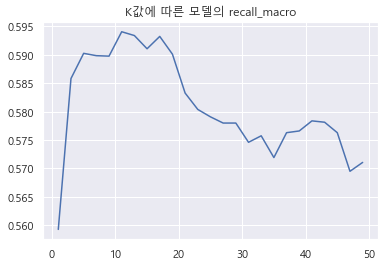

In [232]:
sns.set(); plt.rcParams['font.family']='Malgun Gothic'
results = pd.DataFrame(results, columns=['KNeighbor 개수', 'recall_macro'])
results.sort_values(by='recall_macro', ascending=False).head()
plt.plot(results['KNeighbor 개수'], results['recall_macro'])
plt.title("K값에 따른 모델의 recall_macro")

In [233]:
param_dist = {'knn__n_neighbors' : list(range(5,105, 2)),
              'knn__weights' : ['uniform','distance'],
              'knn__algorithm': ['ball_tree', 'kd_tree'],
              'knn__leaf_size' : list(range(5,50)),
              'knn__p' : [1, 2]
             }
kf = KFold(n_splits=5, random_state=11, shuffle=False)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify=y, random_state=11)

In [234]:
feature_tuple = ('fp', feature_pipeline) 
model_tuple = ('knn', KNeighborsClassifier())
pipe = Pipeline([feature_tuple, model_tuple])
rs = RandomizedSearchCV(pipe, param_distributions= param_dist, cv=kf,
                        n_iter=50, 
                        scoring='recall_macro', verbose=True)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   21.5s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=False),
                   estimator=Pipeline(steps=[('fp',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['tv9',
                                                                                'drama3',
                                                                                '지역_부산울산경남',
                                                                                '지역_경기인천',
                                                                                'tv4',
                                                                                'drama4',
                                                                                '직업_무직기타',
                                                                                '지역_대구경북',
                                                                                'tv15',
                                                                                'tv8',
                                                                                'drama15',
                                                                                '연령',
                                                                                '인터넷평일',
                                                                                '인터넷주말',
                                                                                '모바일주말',
                                                                                '성별_1',
                                                                                '모바일평일',
                                                                                'tv3',
                                                                                'tv2',
                                                                                '성별_2',
                                                                                '주거형태',
                                                                                '직업_기능노무직',
                                                                                'drama9',
                                                                                'drama...
                   param_distributions={'knn__algorithm': ['ball_tree',
                                                           'kd_tree'],
                                        'knn__leaf_size': [5, 6, 7, 8, 9, 10,
                                                           11, 12, 13, 14, 15,
                                                           16, 17, 18, 19, 20,
                                                           21, 22, 23, 24, 25,
                                                           26, 27, 28, 29, 30,
                                                           31, 32, 33, 34, ...],
                                        'knn__n_neighbors': [5, 7, 9, 11, 13,
                                                             15, 17, 19, 21, 23,
                                                             25, 27, 29, 31, 33,
                                                             35, 37, 39, 41, 43,
                                                             45, 47, 49, 51, 53,
                                                             55, 57, 59, 61, 63, ...],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='recall_macro', verbose=True)

In [235]:
print('optimal train score: {:.3f}'.format(rs.best_score_))
print('optimal test score: {:.3f}'.format(rs.score(X_test, y_test)))
print('optimal parameter: {}'.format(rs.best_params_))

optimal train score: 0.611
optimal test score: 0.612
optimal parameter: {'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': 15, 'knn__leaf_size': 19, 'knn__algorithm': 'kd_tree'}


              precision    recall  f1-score   support

           0       0.72      0.85      0.78       522
           1       0.57      0.37      0.45       278

    accuracy                           0.69       800
   macro avg       0.64      0.61      0.62       800
weighted avg       0.67      0.69      0.67       800



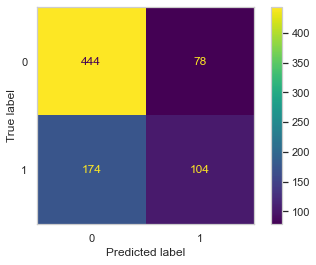

In [236]:
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(rs, X_test, y_test)
y_predict = rs.predict(X_test)
print(classification_report(y_test, y_predict))

In [237]:
from sklearn.dummy import DummyClassifier 
dummy_clf = DummyClassifier(strategy='uniform', random_state=11) 
dummy_clf.fit(X_train, y_train) 
dummy_clf.score(X_test, y_test)

DummyClassifier(random_state=11, strategy='uniform')

0.4875

In [238]:
dummy_predict = dummy_clf.predict(X_test) 
print(classification_report(y_test, dummy_predict)) 

              precision    recall  f1-score   support

           0       0.64      0.49      0.55       522
           1       0.34      0.49      0.40       278

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.48       800
weighted avg       0.53      0.49      0.50       800



(array([  0.,   0.,   0.,   0.,   0., 800.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

(array([ 62., 136., 153., 146.,  96.,  85.,  52.,  35.,  24.,  11.]),
 array([0.        , 0.09495646, 0.18991292, 0.28486938, 0.37982584,
        0.4747823 , 0.56973876, 0.66469522, 0.75965168, 0.85460814,
        0.9495646 ]),
 <a list of 10 Patch objects>)

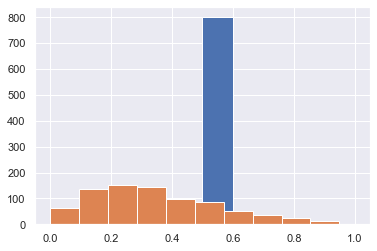

In [239]:
sns.set()
dummy_proba = dummy_clf. predict_proba(X_test) 
y_proba =rs.predict_proba(X_test) 
plt.hist(dummy_proba[:, 1]) 
plt.hist(y_proba[:, 1]) 

In [240]:
y_predict = rs.predict(X_test) 
pd.DataFrame(np.vstack([y_predict, y_proba[:,0], y_proba[:,1]]),
             index=['예측', '비구매_확률', '구매_확률']).round(2)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
예측,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
비구매_확률,0.38,0.68,0.76,0.83,0.53,0.26,0.66,0.48,0.34,0.65,...,0.55,0.82,0.76,0.52,0.52,0.95,0.84,0.87,0.61,0.58
구매_확률,0.62,0.32,0.24,0.17,0.47,0.74,0.34,0.52,0.66,0.35,...,0.45,0.18,0.24,0.48,0.48,0.05,0.16,0.13,0.39,0.42


In [241]:
from sklearn.metrics import confusion_matrix
y_scores = y_proba[:, 1]

def adjusted_classes(y_scores, t): 
    return [1 if y >= t else 0 for y in y_scores] 
 
def precision_recall_threshold(p, r, t): 
    y_pred_adj = adjusted_classes(y_scores, t) 
    cf = confusion_matrix(y_test, y_pred_adj)
    cut_off = t
    fpr = round(cf[0,1]/(cf[0,0]+cf[0,1])*100, 2)
    tpr = round(cf[1,1]/(cf[1,0]+cf[1,1])*100, 2)
    pos_predict = cf[0,1]+cf[1,1]
    summary = [cut_off, tpr, fpr, pos_predict]
    return summary

In [259]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

total_summary =[]
for threshold in np.linspace(0.1, 0.7, 100, endpoint=False) :
    total_summary.append(precision_recall_threshold(p, r, threshold))
data = pd.DataFrame(total_summary, columns = ['분류임계값(t)', '재현율(TPR)', 
                                        '허위양성율(FPR)', '구매 소비자(예측)'])
data.head()

,분류임계값(t),재현율(TPR),허위양성율(FPR),구매 소비자(예측)
0,0.100,95.32,90.42,737
1,0.106,94.24,89.85,731
2,0.112,93.88,88.89,725
3,0.118,93.17,86.97,713
4,0.124,91.01,86.02,702


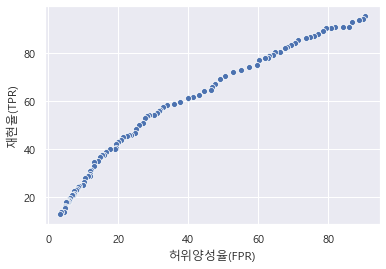

In [243]:
plt.rcParams['font.family']='Malgun Gothic'
sns.scatterplot(x='허위양성율(FPR)', y='재현율(TPR)', data=data)

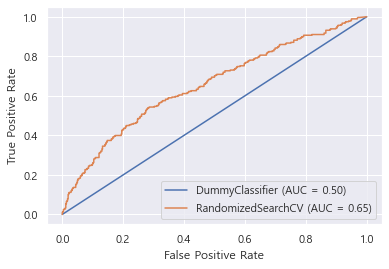

In [244]:
from sklearn.metrics import plot_roc_curve 
dummy_disp = plot_roc_curve(dummy_clf, X_test, y_test) 
knn_disp = plot_roc_curve(rs, X_test, y_test, ax=dummy_disp.ax_)

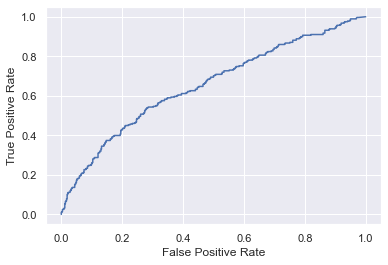

In [245]:
from sklearn.metrics import RocCurveDisplay, roc_curve
sns.set()
clf = rs.best_estimator_
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

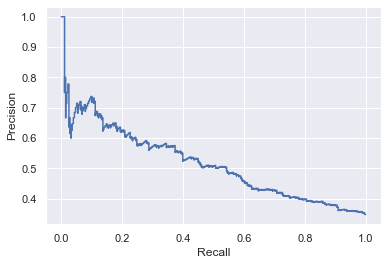

In [246]:
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

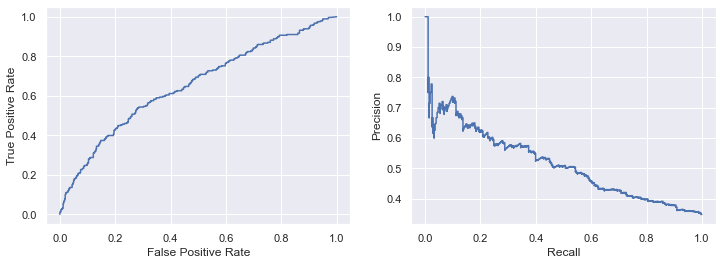

In [247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

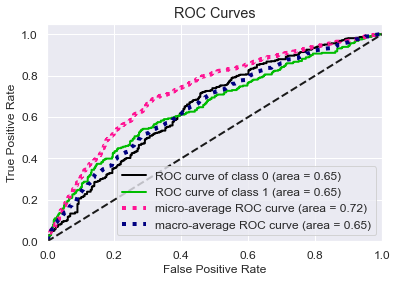

In [248]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_proba)

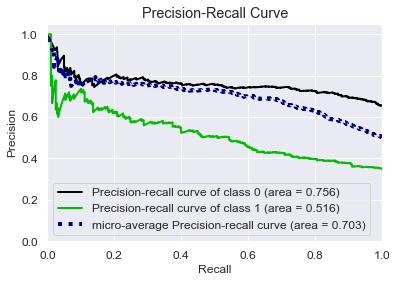

In [249]:
skplt.metrics.plot_precision_recall(y_test, y_proba)

In [250]:
p, r, thresholds = precision_recall_curve(y_test, y_proba[:, 1])
pd.DataFrame(np.vstack([p, r]), index=['정밀도', '재현율']).round(2)
pd.DataFrame(thresholds,columns=['분류임계값']).T.round(2)

,0,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,785,786,787
정밀도,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,...,0.78,0.75,0.71,0.67,0.80,0.75,1.00,1.00,1.0,1.0
재현율,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,0.99,...,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,785,786
분류임계값,0.0,0.03,0.03,0.03,0.03,0.04,0.04,0.04,0.04,0.05,...,0.87,0.88,0.89,0.89,0.9,0.9,0.91,0.92,0.93,0.95


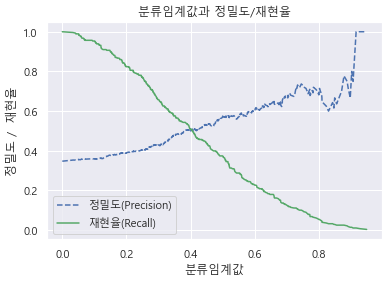

In [251]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 정밀도/재현율') 
    plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.ylabel('정밀도 /  재현율') 
    plt.xlabel('분류임계값') 
    plt.legend(loc='best') 
    
plot_precision_recall_vs_threshold(p, r, thresholds)

In [252]:
y_new_predict = []
threshold = 0.3 
for i in range(0, len(y_proba[:, 1])):
    if y_proba[:, 1][i] > threshold:
        y_new_predict.append(1)          
    else:
        y_new_predict.append(0)         

In [253]:
print(classification_report(y_test, y_new_predict))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       522
           1       0.43      0.65      0.52       278

    accuracy                           0.58       800
   macro avg       0.59      0.59      0.57       800
weighted avg       0.63      0.58      0.59       800



0.6527157584277405

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

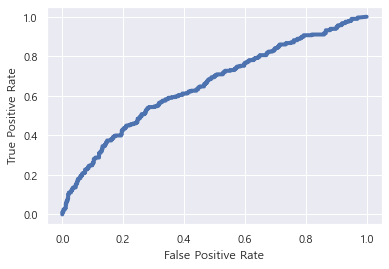

In [254]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test, y_proba[:, 1])
roc_auc_score(y_test, y_proba[:, 1])
plt.plot(fpr, tpr, linewidth=4)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')

In [255]:
from sklearn import set_config
set_config(display='diagram')
pipe = make_pipeline(feature_pipeline, KNeighborsClassifier(n_neighbors = 13))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tv9', 'drama3', '지역_부산울산경남',
                                                   '지역_경기인천', 'tv4', 'drama4',
                                                   '직업_무직기타', '지역_대구경북', 'tv15',
                                                   'tv8', 'drama15', '연령',
                                                   '인터넷평일', '인터넷주말', '모바일주말',
                                                   '성별_1', '모바일평일', 'tv3',
                                                   'tv2', '성별_2', '주거형태',
                                                   '직업_기능노무직', 'drama9',
                                                   'drama8', '직업_학생재수생',
                                                   'tv7']),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=13))])

In [256]:
from joblib import dump, load
dump(rs.best_estimator_, '../output/knn.joblib')
model = load('../output/knn.joblib')
model

['../output/knn.joblib']

Pipeline(steps=[('fp',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tv9', 'drama3', '지역_부산울산경남',
                                                   '지역_경기인천', 'tv4', 'drama4',
                                                   '직업_무직기타', '지역_대구경북', 'tv15',
                                                   'tv8', 'drama15', '연령',
                                                   '인터넷평일', '인터넷주말', '모바일주말',
                                                   '성별_1', '모바일평일', 'tv3',
                                                   'tv2', '성별_2', '주거형태',
                                                   '직업_기능노무직', 'drama9',
                                                   'drama8', '직업_학생재수생',
                                                   'tv7']),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('knn',
                 KNeighborsClassifier(algorithm='kd_tree', leaf_size=19,
                                      n_neighbors=15, p=1,
                                      weights='distance'))])

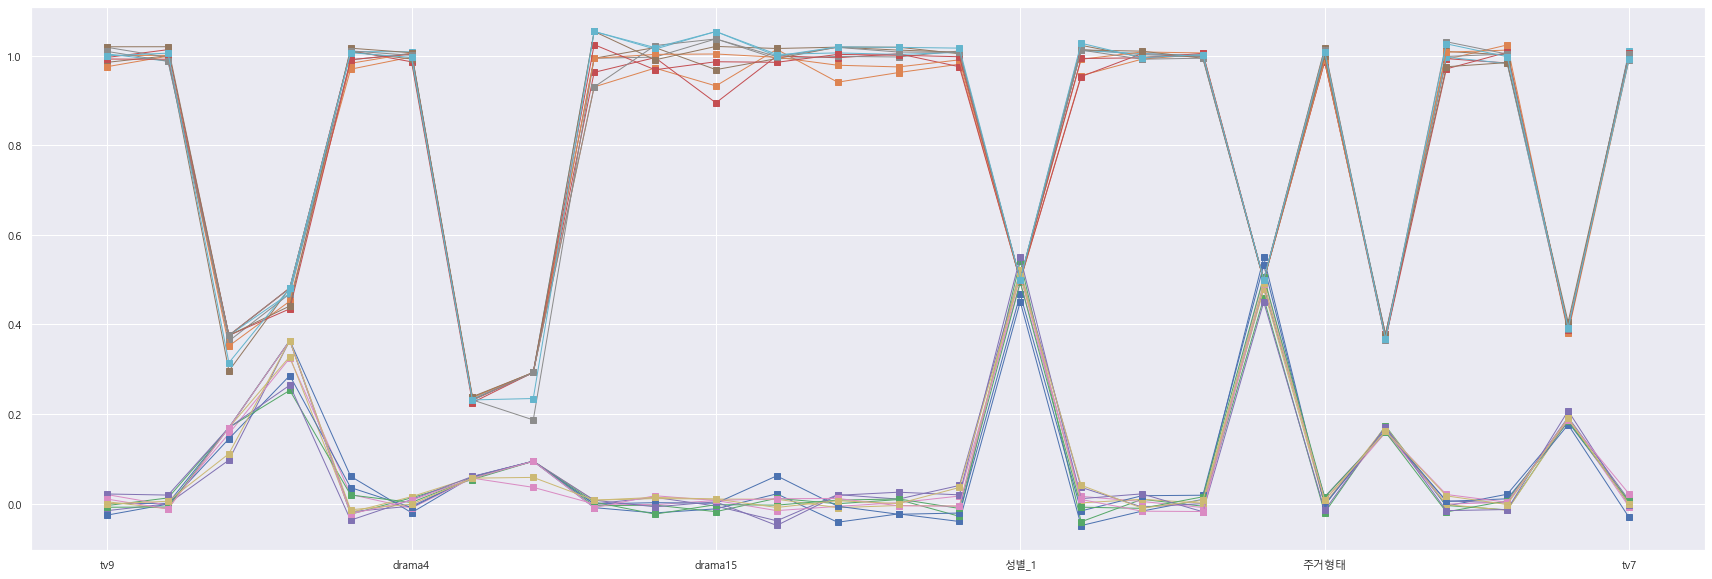

In [257]:
kf_10 = KFold(n_splits=10, random_state=1357)
for train, test in kf_10.split(X):
    X.loc[train][num_attribs ].mean().plot(lw=1, ls="-", marker = 's', figsize=(30,10))
    X.loc[train][num_attribs ].std().plot(lw=1, ls="-", marker = 's', figsize=(30,10))